**NOTE**: Document section is at bottom of the page. 

## Read dataset "./data.csv"

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
import statsmodels.api as sm


# read csv file into 'df' dataframe
df = pd.read_csv('./data.csv', sep = ",")
print("Length of data: {}".format(len(df)))

# print some data rows
df.head()

Length of data: 1000


,fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
0,NaN,13,younger mom,39.0,full term,10.0,married,38.0,7.63,not low,male,nonsmoker,not white
1,NaN,14,younger mom,42.0,full term,15.0,married,20.0,7.88,not low,male,nonsmoker,not white
2,19.0,15,younger mom,37.0,full term,11.0,married,38.0,6.63,not low,female,nonsmoker,white
3,21.0,15,younger mom,41.0,full term,6.0,married,34.0,8.00,not low,male,nonsmoker,white
4,NaN,15,younger mom,39.0,full term,9.0,married,27.0,6.38,not low,female,nonsmoker,not white


## Applying Statistics

### Handle Missing Value

In [252]:
df.fillna(df.mean(), inplace=True)
df.drop_duplicates(inplace=True)
for col in ["mature", "premie", "marital", "lowbirthweight", "gender", "habit", "whitemom"]:
    df[col].fillna(df[col].mode()[0], inplace=True)
df

,fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
0,30.25573,13,younger mom,39.0,full term,10.0,married,38.0,7.63,not low,male,nonsmoker,not white
1,30.25573,14,younger mom,42.0,full term,15.0,married,20.0,7.88,not low,male,nonsmoker,not white
2,19.00000,15,younger mom,37.0,full term,11.0,married,38.0,6.63,not low,female,nonsmoker,white
3,21.00000,15,younger mom,41.0,full term,6.0,married,34.0,8.00,not low,male,nonsmoker,white
4,30.25573,15,younger mom,39.0,full term,9.0,married,27.0,6.38,not low,female,nonsmoker,not white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,47.00000,42,mature mom,40.0,full term,10.0,not married,26.0,8.44,not low,male,nonsmoker,not white
996,34.00000,42,mature mom,38.0,full term,18.0,not married,20.0,6.19,not low,female,nonsmoker,white
997,39.00000,45,mature mom,40.0,full term,15.0,not married,32.0,6.94,not low,female,nonsmoker,white
998,55.00000,46,mature mom,31.0,premie,8.0,not married,25.0,4.56,low,female,nonsmoker,not white


In [253]:
df.describe()

,fage,mage,weeks,visits,gained,weight
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,30.255730,27.000000,38.334669,12.104945,30.325797,7.10100
std,6.157735,6.213583,2.928617,3.937078,14.047528,1.50886
min,14.000000,13.000000,20.000000,0.000000,0.000000,1.00000
25%,26.000000,22.000000,37.000000,10.000000,21.000000,6.38000
50%,30.255730,27.000000,39.000000,12.000000,30.000000,7.31000
75%,34.000000,32.000000,40.000000,15.000000,38.000000,8.06000
max,55.000000,50.000000,45.000000,30.000000,85.000000,11.75000


### convert string values to a unique integer

In [254]:
to_replace = {}
for col in ["mature", "premie", "marital", "lowbirthweight", "gender", "habit", "whitemom"]:
    to_replace[col] = {}
    unqs = df[col].unique()
    for idx, unq in enumerate(unqs):
        to_replace[col][unq] = idx


# to_replace = {
#     'mature': {'younger mom': 0, 'mature mom': 1},
#     'premie': {'full term': 0, 'premie': 1},
#     'marital': {'married': 0, 'not married': 1},
#     'lowbirthweight': {'not low': 0, 'low': 1},
#     'gender': {'male': 0, 'female': 1},
#     'habit': {'nonsmoker': 0, 'smoker': 1}, 
#     "whitemom": {'not white': 0, 'white': 1}
# }

print(to_replace)

df.replace(to_replace, inplace=True)
df.fillna(df.mode(), inplace=True)
df


{'mature': {'younger mom': 0, 'mature mom': 1}, 'premie': {'full term': 0, 'premie': 1}, 'marital': {'married': 0, 'not married': 1}, 'lowbirthweight': {'not low': 0, 'low': 1}, 'gender': {'male': 0, 'female': 1}, 'habit': {'nonsmoker': 0, 'smoker': 1}, 'whitemom': {'not white': 0, 'white': 1}}


,fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
0,30.25573,13,0,39.0,0,10.0,0,38.0,7.63,0,0,0,0
1,30.25573,14,0,42.0,0,15.0,0,20.0,7.88,0,0,0,0
2,19.00000,15,0,37.0,0,11.0,0,38.0,6.63,0,1,0,1
3,21.00000,15,0,41.0,0,6.0,0,34.0,8.00,0,0,0,1
4,30.25573,15,0,39.0,0,9.0,0,27.0,6.38,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,47.00000,42,1,40.0,0,10.0,1,26.0,8.44,0,0,0,0
996,34.00000,42,1,38.0,0,18.0,1,20.0,6.19,0,1,0,1
997,39.00000,45,1,40.0,0,15.0,1,32.0,6.94,0,1,0,1
998,55.00000,46,1,31.0,1,8.0,1,25.0,4.56,1,1,0,0


### Measures of Central Tendency ~ Mean, Median, Mode

In [255]:
df.mean()

fage              30.255730
mage              27.000000
mature             0.133000
weeks             38.334669
premie             0.152000
visits            12.104945
marital            0.614000
gained            30.325797
weight             7.101000
lowbirthweight     0.111000
gender             0.503000
habit              0.126000
whitemom           0.716000
dtype: float64

In [256]:
df.median()

fage              30.25573
mage              27.00000
mature             0.00000
weeks             39.00000
premie             0.00000
visits            12.00000
marital            1.00000
gained            30.00000
weight             7.31000
lowbirthweight     0.00000
gender             1.00000
habit              0.00000
whitemom           1.00000
dtype: float64

In [257]:
df.mode()

,fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
0,30.25573,20,0,39.0,0,12.0,1,30.0,7.44,0,1,0,1


### Data Dispersion ~ Range, Inter-Quartile Range, Standard Deviation, Variance

In [258]:
tmp_df = df.apply(lambda x: pd.to_numeric(x, errors='coerce'))

print("Range: ")
(tmp_df.max() - tmp_df.min()).dropna()

Range: 


fage              41.00
mage              37.00
mature             1.00
weeks             25.00
premie             1.00
visits            30.00
marital            1.00
gained            85.00
weight            10.75
lowbirthweight     1.00
gender             1.00
habit              1.00
whitemom           1.00
dtype: float64

In [259]:
print("Inter-Quartile Range: ");
q_df = df.quantile([0.25, 0.5, 0.75])
q_df.max() - q_df.min()

Inter-Quartile Range: 


fage               8.00
mage              10.00
mature             0.00
weeks              3.00
premie             0.00
visits             5.00
marital            1.00
gained            17.00
weight             1.68
lowbirthweight     0.00
gender             1.00
habit              0.00
whitemom           1.00
dtype: float64

In [260]:
df.std()

fage               6.157735
mage               6.213583
mature             0.339745
weeks              2.928617
premie             0.359201
visits             3.937078
marital            0.487074
gained            14.047528
weight             1.508860
lowbirthweight     0.314289
gender             0.500241
habit              0.332015
whitemom           0.451162
dtype: float64

In [261]:
df.var()

fage               37.917703
mage               38.608609
mature              0.115426
weeks               8.576797
premie              0.129025
visits             15.500586
marital             0.237241
gained            197.333056
weight              2.276659
lowbirthweight      0.098778
gender              0.250241
habit               0.110234
whitemom            0.203548
dtype: float64

### Correlation

In [262]:
df.corr()

,fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
fage,1.000000,0.705829,0.473118,-0.014445,0.003099,0.071025,0.292566,-0.038375,0.062814,0.002217,-0.053751,-0.073803,0.097857
mage,0.705829,1.000000,0.642035,-0.031995,-0.008521,0.159713,0.438903,-0.059555,0.055066,-0.002050,0.008695,-0.107233,0.169254
mature,0.473118,0.642035,1.000000,-0.041425,0.022836,0.049580,0.159320,-0.041534,0.006379,0.030346,0.006485,-0.051097,0.057286
weeks,-0.014445,-0.031995,-0.041425,1.000000,-0.735430,0.171321,0.068899,0.089198,0.668321,-0.587065,-0.019134,0.014239,0.098523
premie,0.003099,-0.008521,0.022836,-0.735430,1.000000,-0.144920,-0.087698,-0.130185,-0.553766,0.559745,-0.030394,-0.001276,-0.079261
visits,0.071025,0.159713,0.049580,0.171321,-0.144920,1.000000,0.228048,0.057942,0.132437,-0.114335,0.040072,-0.073605,0.075109
marital,0.292566,0.438903,0.159320,0.068899,-0.087698,0.228048,1.000000,0.024512,0.157882,-0.118709,-0.003459,-0.107481,0.329686
gained,-0.038375,-0.059555,-0.041534,0.089198,-0.130185,0.057942,0.024512,1.000000,0.150268,-0.100187,-0.035610,0.041906,0.072219
weight,0.062814,0.055066,0.006379,0.668321,-0.553766,0.132437,0.157882,0.150268,1.000000,-0.718427,-0.132159,-0.068548,0.159301
lowbirthweight,0.002217,-0.002050,0.030346,-0.587065,0.559745,-0.114335,-0.118709,-0.100187,-0.718427,1.000000,0.020164,0.038506,-0.081014


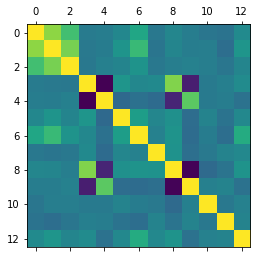

In [263]:
plt.matshow(df.corr())
plt.show()

## Plotting

D:\semester7\venv_global_python\venv\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<AxesSubplot:title={'center':'fage'}>,
        <AxesSubplot:title={'center':'mage'}>,
        <AxesSubplot:title={'center':'mature'}>,
        <AxesSubplot:title={'center':'weeks'}>],
       [<AxesSubplot:title={'center':'premie'}>,
        <AxesSubplot:title={'center':'visits'}>,
        <AxesSubplot:title={'center':'marital'}>,
        <AxesSubplot:title={'center':'gained'}>],
       [<AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'lowbirthweight'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'habit'}>],
       [<AxesSubplot:title={'center':'whitemom'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

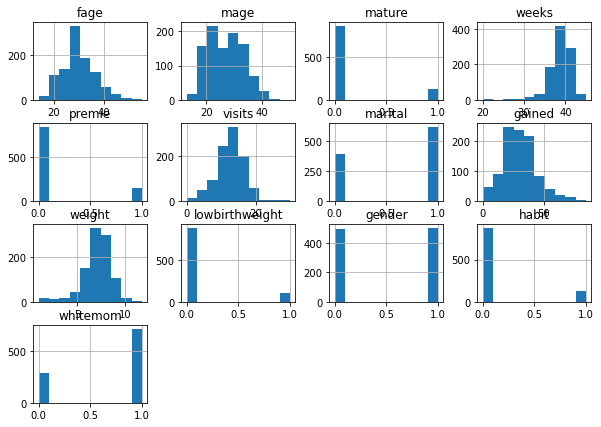

In [264]:
fig = plt.figure(figsize =(10, 7)) 
ax = fig.add_axes([0, 0, 1, 1])
df.hist(ax=ax)

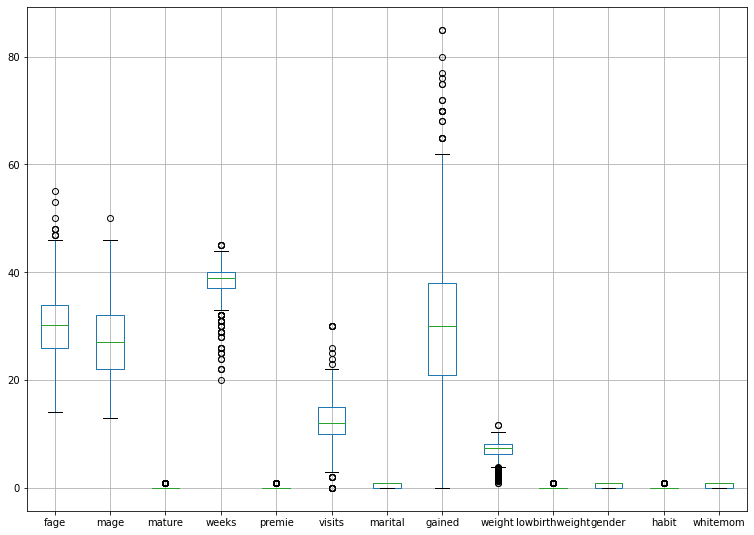

In [265]:
fig = plt.figure(figsize =(10, 7)) 
ax = fig.add_axes([0, 0, 1, 1])
df.boxplot()

> ***Define a function to draw scatter plot together with associated histogram***

In [266]:
def draw_scatter_hist(col_x, col_y):
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    spacing = 0.005

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 0.2]
    rect_histy = [left + width + spacing, bottom, 0.2, height]

    plt.figure(figsize =(8, 8)) 
    ax_scatter = plt.axes(rect_scatter)
    ax_scatter.tick_params(direction='in', top=True, right=True)
    ax_histx = plt.axes(rect_histx)
    ax_histx.tick_params(direction='in', labelbottom=False)
    ax_histy = plt.axes(rect_histy)
    ax_histy.tick_params(direction='in', labelleft=False)

    df.plot.scatter(x=col_x, y=col_y, ax=ax_scatter)
    df[col_x].hist(ax=ax_histx)
    df[col_y].hist(ax=ax_histy, orientation='horizontal')

    plt.show()


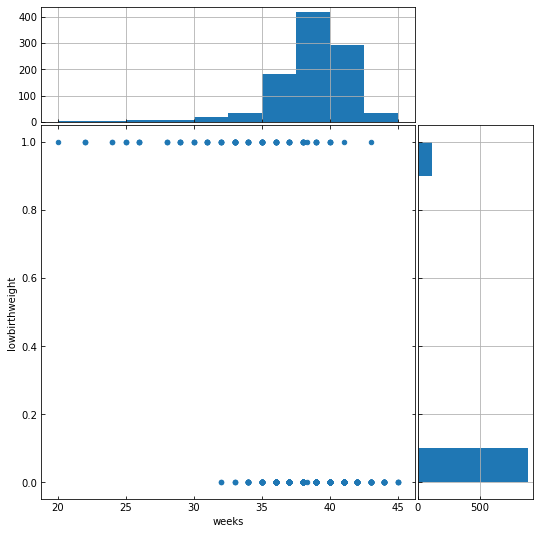

In [271]:
draw_scatter_hist("weeks", "lowbirthweight")

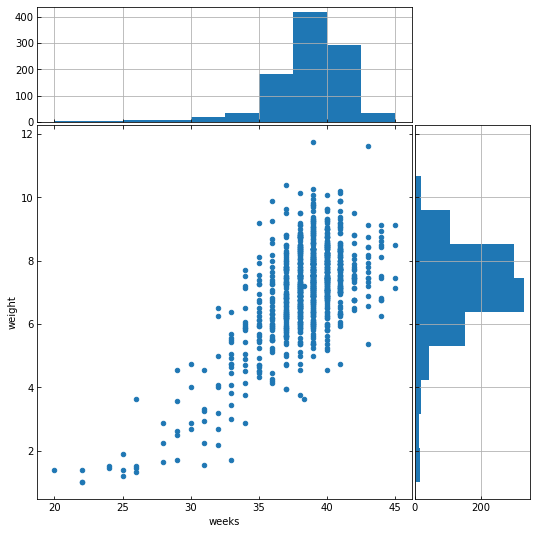

In [273]:
draw_scatter_hist("weeks", "weight")

array([[<AxesSubplot:xlabel='fage', ylabel='fage'>,
        <AxesSubplot:xlabel='mage', ylabel='fage'>,
        <AxesSubplot:xlabel='mature', ylabel='fage'>,
        <AxesSubplot:xlabel='weeks', ylabel='fage'>,
        <AxesSubplot:xlabel='premie', ylabel='fage'>,
        <AxesSubplot:xlabel='visits', ylabel='fage'>,
        <AxesSubplot:xlabel='marital', ylabel='fage'>,
        <AxesSubplot:xlabel='gained', ylabel='fage'>,
        <AxesSubplot:xlabel='weight', ylabel='fage'>,
        <AxesSubplot:xlabel='lowbirthweight', ylabel='fage'>,
        <AxesSubplot:xlabel='gender', ylabel='fage'>,
        <AxesSubplot:xlabel='habit', ylabel='fage'>,
        <AxesSubplot:xlabel='whitemom', ylabel='fage'>],
       [<AxesSubplot:xlabel='fage', ylabel='mage'>,
        <AxesSubplot:xlabel='mage', ylabel='mage'>,
        <AxesSubplot:xlabel='mature', ylabel='mage'>,
        <AxesSubplot:xlabel='weeks', ylabel='mage'>,
        <AxesSubplot:xlabel='premie', ylabel='mage'>,
        <AxesSubplot:xlabel

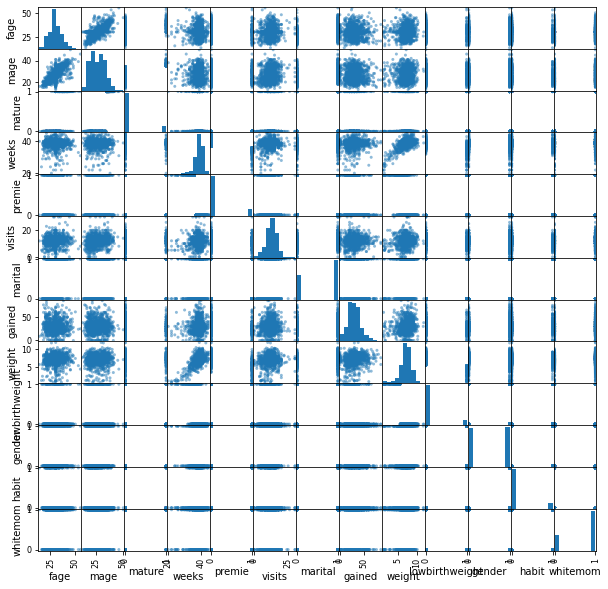

In [268]:
pd.plotting.scatter_matrix(df, figsize=(10,10))

> ***QQ Plot***

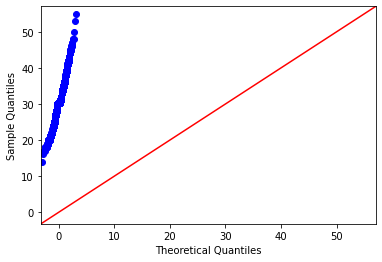

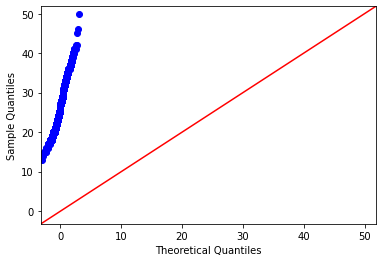

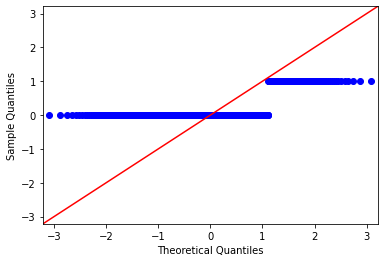

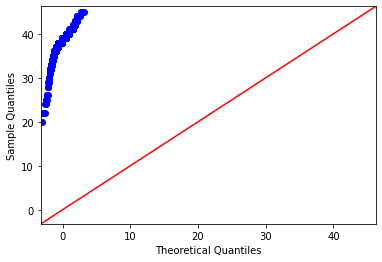

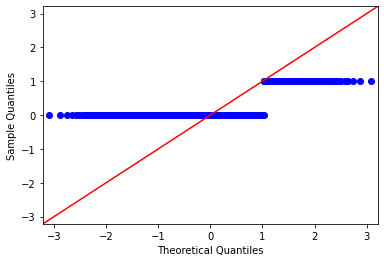

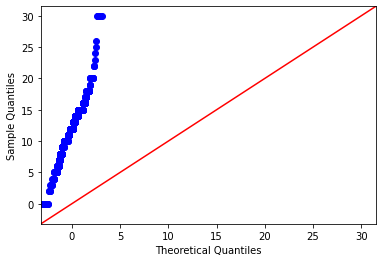

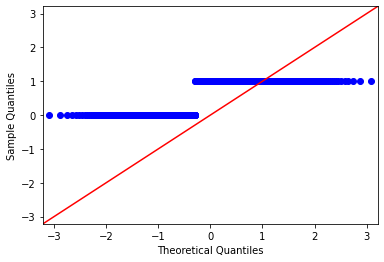

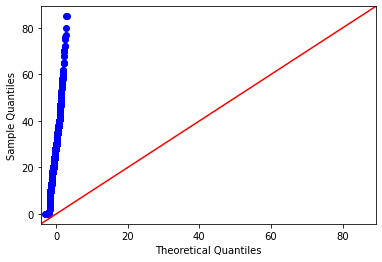

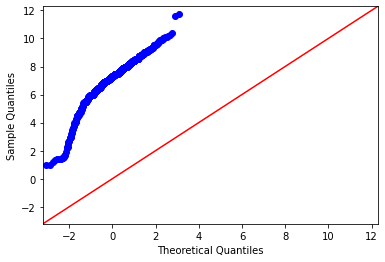

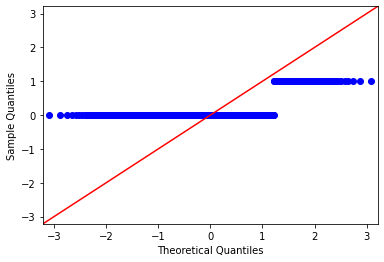

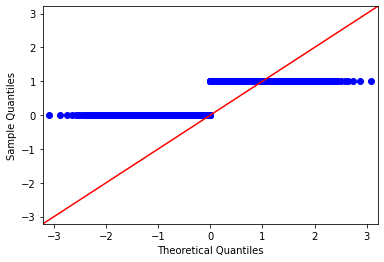

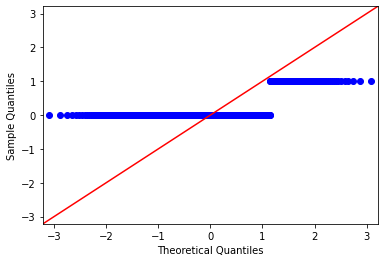

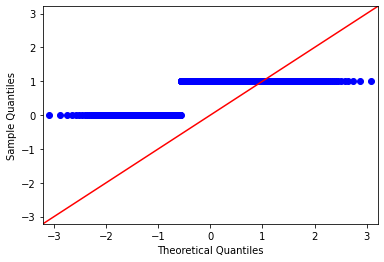

In [269]:
for col in df.columns:
    fig = sm.qqplot(df[col], line='45')
    plt.show()

### Dissimimilarity Matrix -- Distance Matrix

In [270]:
df_20 = tmp_df[1:952:50]
# print(len(df_20))
pdist(df_20, 'euclidean')

array([14.77609333, 28.08687764,  8.86887253, 18.68574522, 14.0863202 ,
       18.01367241, 16.29608849, 21.62573467, 13.67376747, 32.9654713 ,
       16.34404778, 18.22131549, 18.67278654, 23.40302758, 21.79061353,
       28.78815902, 28.78942233, 29.42058123, 27.30935413, 37.39377488,
       17.81098072, 22.02599373,  9.79775995, 20.93594039, 23.79759303,
       30.72624504, 18.62991143, 42.03049488, 22.70543767, 25.24606108,
       24.19165352, 31.65064928, 25.32908407, 37.37023414, 36.24310279,
       32.49579819, 32.23352292, 22.8726823 , 19.78004044, 38.35721705,
       18.69177359, 19.57511675, 13.16681798, 23.56      , 10.41810443,
       21.80739553, 20.7853891 , 21.58786928, 19.9720705 , 25.85840096,
       18.54723699, 19.09599173, 30.79874186, 35.29892916, 12.77865308,
       17.0473434 , 12.21540395,  9.36879928, 14.61697985,  6.82381249,
       26.00125762,  8.99832194, 10.90367086, 11.59053309, 15.8405871 ,
       14.13520209, 21.48918332, 21.95003276, 21.39748817, 21.73

## Document

Data pada setiap kolom memiliki nilai penyimpangan(*skewness*) yang tergolong rendah ditunjukan pada grafik *boxplot* di atas. Kolom *Fage* dan *Mage*, *Weight* dan *Week*, *Mage* dan *Mature* memiliki sifat simetri yang cukup tinggi dibuktikan dari nilai korelasi data. <br>
Berdasarkan plot scatter untuk kolom *weeks* dan *lowbirthweight*, dapat dilihat semakin lama dalam kondisi hamil(nilai *weeks* tinggi), berat bayinya cenderung normal(nilai *lowbirthweight* yaitu *not low*). Hal ini juga sebanding dengan plot scatter untuk kolom *weeks* dan *weight*, semakin tinggi weeks, semakin berat bayinya(*weight* tinggi). <br>

<br>
<br>

Pertanyaan:
1. Apakah untuk data diatas cukup di-handle missing values menggunakan nilai mean untuk numerik dan mode untuk kolom berjenis klasifikasi?